In [1]:
import sys

import numpy as np
import pandas as pd

import pmdarima as pm

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("ggplot")

In [2]:
onedrive_link = "https://1drv.ms/u/s!AiqdXCxPTydhoogqfj86CvQcSInxtA?e=XdSlpK"
converted_link = create_onedrive_directdownload(onedrive_link)
df = pd.read_csv(converted_link, index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


## With Google Stocks

In [3]:
goog = df.query("Name == 'GOOG'")["Close"]

# goog = np.log(df.query("Name == 'GOOG'")["Close"])

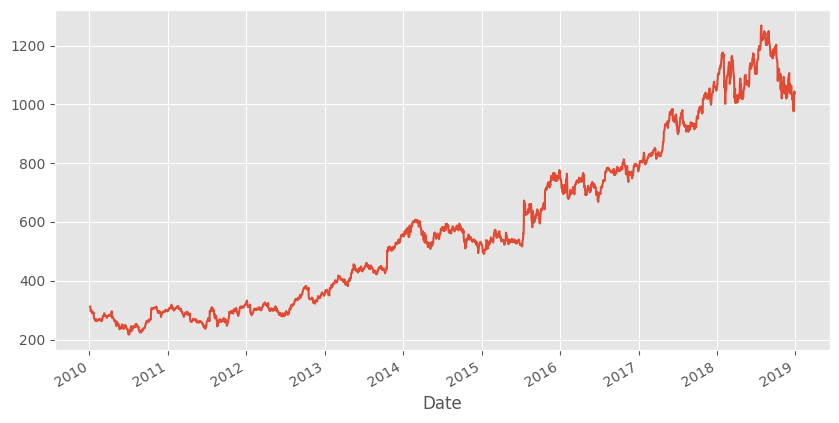

In [5]:
goog.plot(figsize=(10, 5));

In [6]:
# create training and test set
Ntest = 30
train  = goog.iloc[:-Ntest]
test   = goog.iloc[-Ntest:]

In [7]:
# not find and train the best model

model = pm.auto_arima(train,
    error_action = "ignore",
    trace = True,
    suppress_warnings = True,
    maxiter = 10,
    seasonal = False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.33 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 3.289 seconds


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Sun, 05 Feb 2023   AIC                          16264.983
Time:                        12:53:08   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [10]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params["order"][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(fulldata.index, fulldata, label="data")
    ax.plot(train.index[d:], train_pred, label="fitted")
    ax.plot(test.index, test_pred, label="forecast")
    ax.fill_between(test.index, conf_int[:,0], conf_int[:,1], color="red", alpha=0.3)
    ax.legend()
    plt.show()

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


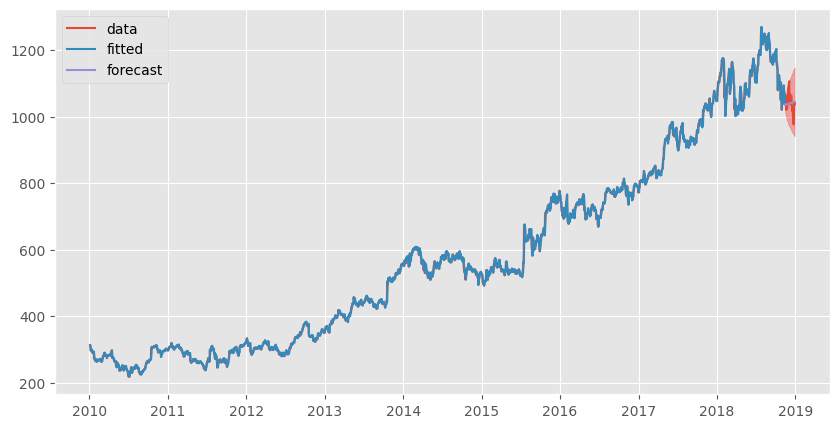

In [11]:
plot_result(model, goog, train, test)

In [15]:
def plot_test(model, test):
    test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(test.index, test, label="true")
    ax.plot(test.index, test_pred, label="forecast")
    ax.fill_between(test.index, conf_int[:,0], conf_int[:,1], color="red", alpha=0.3)
    ax.legend()
    plt.show()

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


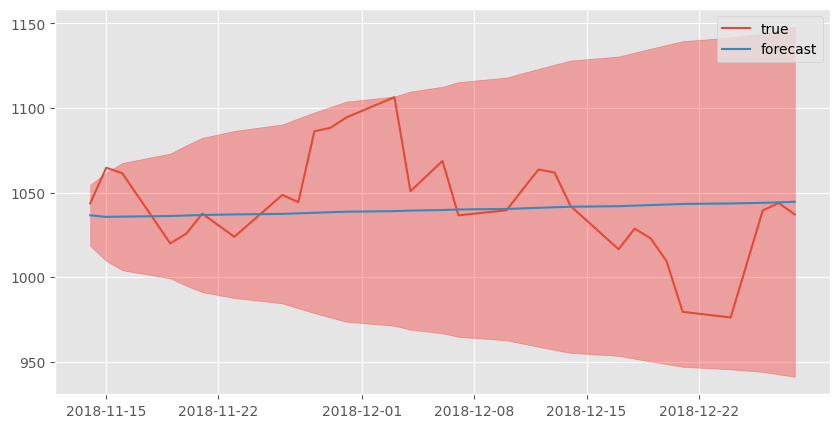

In [16]:
plot_test(model, test)

In [30]:
def rmse(y, t):
    return np.sqrt(np.mean( (t - y) ** 2))

In [38]:
print(f"RMSE ARIMA: {rmse(model.predict(n_periods=Ntest).values, test.values):.3f}")
print(f"RMSE Naive:   {rmse(train.iloc[-1], test):.3f}")

RMSE ARIMA: 30.437
RMSE Naive:   30.030


c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## With Apple Stocks

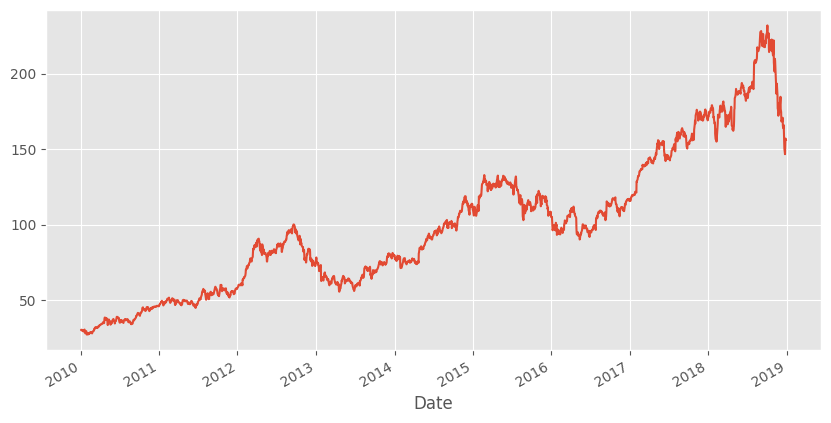

In [42]:
aapl = df.query("Name == 'AAPL'")["Close"]
# aapl = np.log(aapl)
aapl.plot(figsize=(10, 5));

In [43]:
train = aapl.iloc[:-Ntest]
test  = aapl.iloc[-Ntest:]

In [44]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.18 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Sun, 05 Feb 2023   AIC                           8570.296
Time:                        13:16:43   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


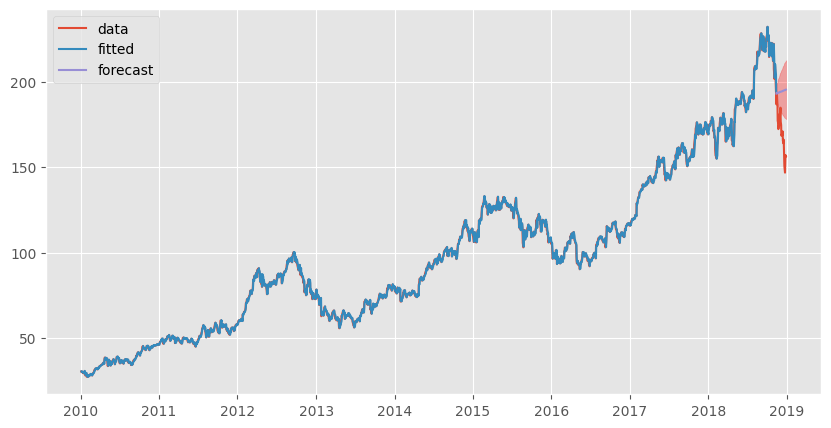

In [46]:
plot_result(model, aapl, train, test)

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


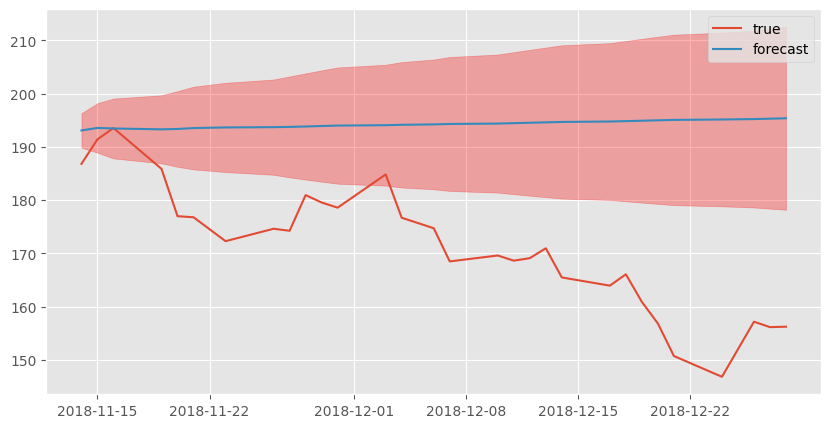

In [47]:
plot_test(model, test)

In [48]:
print(f"RMSE ARIMA: {rmse(model.predict(n_periods=Ntest).values, test.values):.3f}")
print(f"RMSE Naive:   {rmse(train.iloc[-1], test):.3f}")

RMSE ARIMA: 26.095
RMSE Naive:   24.027


c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## IBM Stocks Data

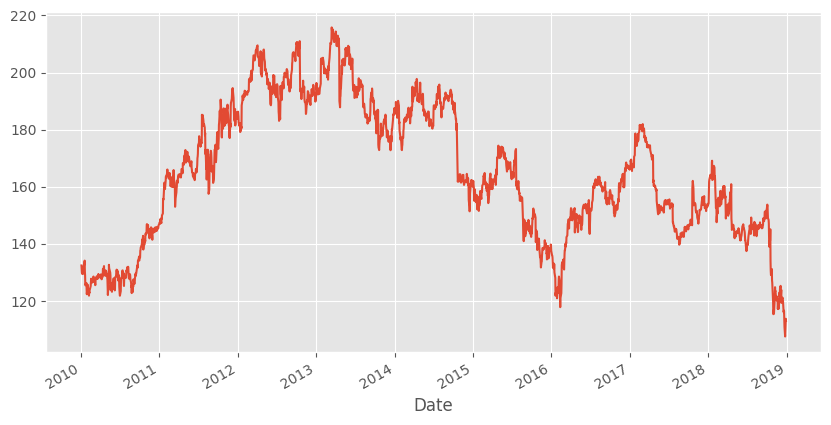

In [49]:
ibm = df.query("Name == 'IBM'")["Close"]

ibm.plot(figsize=(10, 5));

In [50]:
train = ibm.iloc[:-Ntest]
test  = ibm.iloc[-Ntest:]

In [51]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.987 seconds


In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Sun, 05 Feb 2023   AIC                           9434.097
Time:                        15:37:17   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


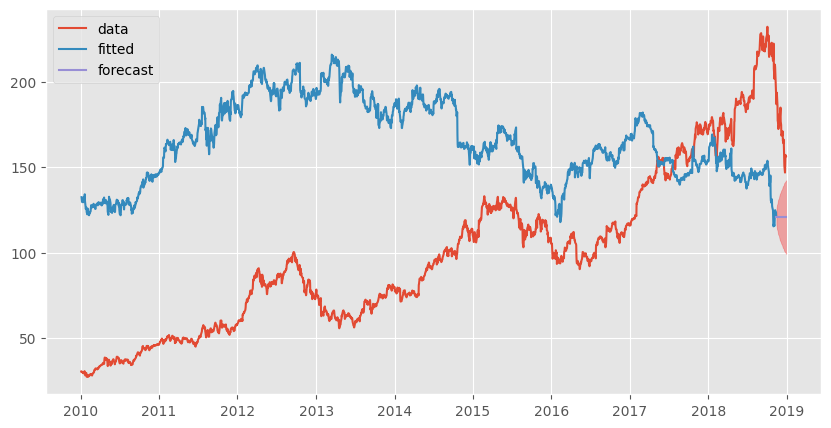

In [53]:
plot_result(model, aapl, train, test)

c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


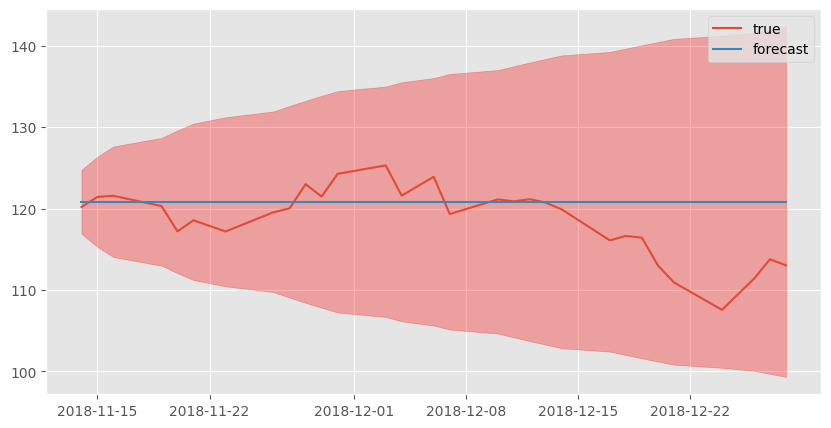

In [54]:
plot_test(model, test)

In [55]:
print(f"RMSE ARIMA: {rmse(model.predict(n_periods=Ntest).values, test.values):.3f}")
print(f"RMSE Naive:   {rmse(train.iloc[-1], test):.3f}")

RMSE ARIMA: 4.763
RMSE Naive:   4.763


c:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
